In [1]:
import google.generativeai as genai
import os
import key
import PIL.Image

c:\Users\vivek\anaconda3\envs\vivek\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from IPython.display import display
from IPython.display import Markdown

# setting up the api key

In [3]:
os.environ['GOOGLE_API_KEY']=key.gemini_api_key

In [4]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

to list down all the gemini models

In [5]:
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods: 
        print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


# text to text generation using gemini

In [6]:
model = genai.GenerativeModel('gemini-1.0-pro')

In [7]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.0-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
)

generating content using gemini api

In [8]:
response=model.generate_content("tell me about VIT chennai in 100 words")

In [9]:
print(response.text)

VIT Chennai, established in 2019, is a private engineering and technology institution in Chennai, India. It is a part of the Vellore Institute of Technology (VIT) group. The institute offers undergraduate and postgraduate programs in various engineering and technology disciplines, as well as management, science, and humanities. VIT Chennai boasts state-of-the-art infrastructure, including modern classrooms, well-equipped laboratories, a library with a vast collection of resources, and sports facilities. The campus is also home to a research center and innovation hub.


In [10]:
response.candidates

[index: 0
content {
  parts {
    text: "VIT Chennai, established in 2019, is a private engineering and technology institution in Chennai, India. It is a part of the Vellore Institute of Technology (VIT) group. The institute offers undergraduate and postgraduate programs in various engineering and technology disciplines, as well as management, science, and humanities. VIT Chennai boasts state-of-the-art infrastructure, including modern classrooms, well-equipped laboratories, a library with a vast collection of resources, and sports facilities. The campus is also home to a research center and innovation hub."
  }
  role: "model"
}
finish_reason: STOP
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

# to steam the model response


In [11]:
response=model.generate_content("tell me about VIT chennai in 100 words",stream=True)

In [12]:
for data in response:
    print("_____________")
    print(data.text)
    print("_____________")

_____________
VIT Chennai, established in 2019, is a renowned technical institution
_____________
_____________
 known for its academic excellence and industry collaborations. It offers undergraduate and postgraduate programs in Engineering, Science, and Management. The campus boasts state-of-the-
_____________
_____________
art infrastructure, including research labs, smart classrooms, and a sprawling library. VIT Chennai emphasizes hands-on learning through industry-sponsored projects, internships, and a strong focus on innovation. It fosters a vibrant student life with numerous clubs, sports facilities, and cultural events. The institution has earned recognition for its quality education,
_____________
_____________
 research contributions, and placement track record.
_____________


# using the generative model

In [13]:
vision_model=genai.GenerativeModel("gemini-1.5-flash")

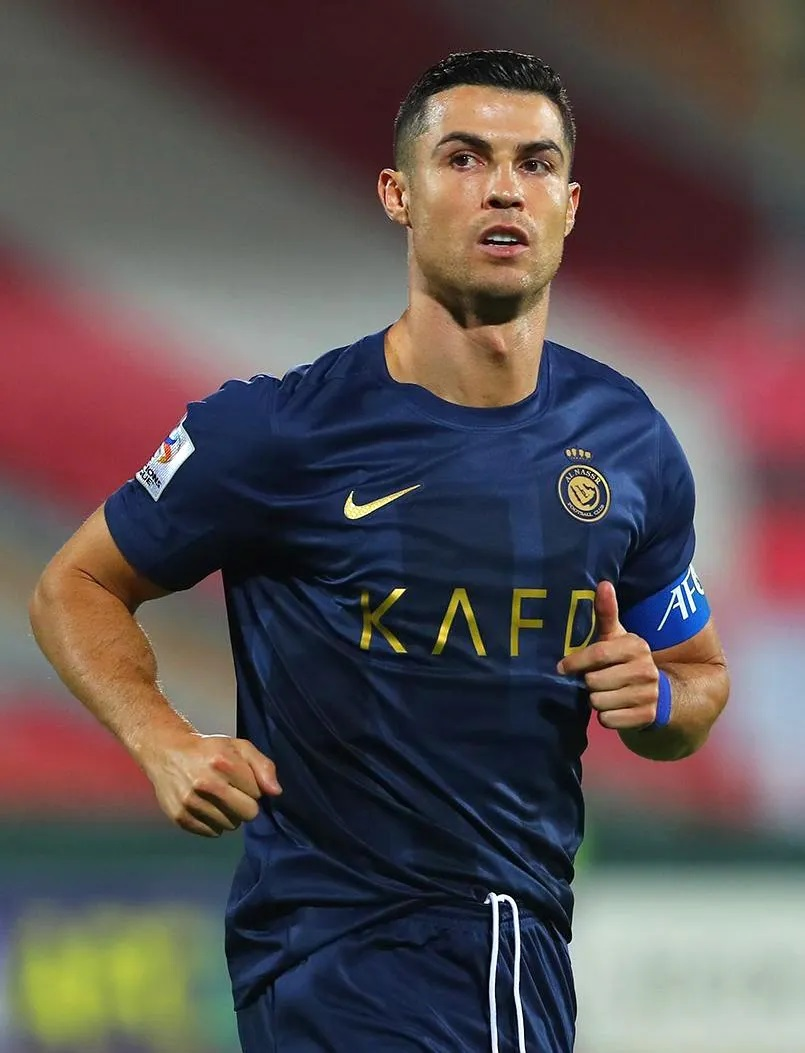

In [14]:
img=PIL.Image.open("ronaldo.jpg")
img

In [15]:
response=vision_model.generate_content(img)

In [17]:
response.text

'This is a photo of Cristiano Ronaldo. He is wearing a blue jersey with the team logo, and a gold inscription that reads "KAFFD". He is wearing a blue band on his right wrist.  He is looking towards the camera and his expression is focused.'